In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [2]:
data80 = pd.read_csv('105v2.csv', parse_dates=True, index_col='DateTime',encoding="windows-1252") # или 105
data80.head(5)

,AffinityIndex,SerialNumber,H,Tmean,WmeanH,WindDirectionH(Â°),WminH,WmaxH,WmeanV,AtmosphericPressure,RelativeHumidity,TdewPoint(Â°C),WaterVaporElasticity,AbsolutusHumidity,DensityofAir,SpeedofSoundinAir
DateTime,,,,,,,,,,,,,,,,
2017-07-22 00:01:00,6,12427AMK-03,15,15.86,0.20,94.53,0.01,0.44,-0.13,750.45,100.0,15.86,17.99,14.53,1.1954,342.12
2017-07-22 00:02:00,6,12427AMK-03,15,15.88,0.28,104.28,0.15,0.53,-0.19,750.45,100.0,15.88,18.01,14.55,1.1953,342.14
2017-07-22 00:03:00,6,12427AMK-03,15,15.87,0.23,68.53,0.11,0.36,-0.19,750.45,100.0,15.87,17.99,14.54,1.1954,342.13
2017-07-22 00:04:00,6,12427AMK-03,15,15.95,0.17,47.04,0.01,0.33,-0.18,750.45,100.0,15.95,18.09,14.62,1.1950,342.18
2017-07-22 00:05:00,6,12427AMK-03,15,16.01,0.06,11.99,0.01,0.22,-0.19,750.45,100.0,16.01,18.16,14.68,1.1947,342.22


In [3]:
data80 = data80.groupby('DateTime')['Tmean'].sum().reset_index()

In [4]:
data80 = data80.set_index('DateTime')
data80.index

DatetimeIndex(['2017-07-22 00:01:00', '2017-07-22 00:02:00',
               '2017-07-22 00:03:00', '2017-07-22 00:04:00',
               '2017-07-22 00:05:00', '2017-07-22 00:06:00',
               '2017-07-22 00:07:00', '2017-07-22 00:08:00',
               '2017-07-22 00:09:00', '2017-07-22 00:10:00',
               ...
               '2020-04-09 23:50:00', '2020-04-09 23:51:00',
               '2020-04-09 23:52:00', '2020-04-09 23:53:00',
               '2020-04-09 23:54:00', '2020-04-09 23:55:00',
               '2020-04-09 23:56:00', '2020-04-09 23:57:00',
               '2020-04-09 23:58:00', '2020-04-09 23:59:00'],
              dtype='datetime64[ns]', name='DateTime', length=1183038, freq=None)

In [5]:
y = data80['Tmean'].resample('MS').mean() # MS - месяц, D - день


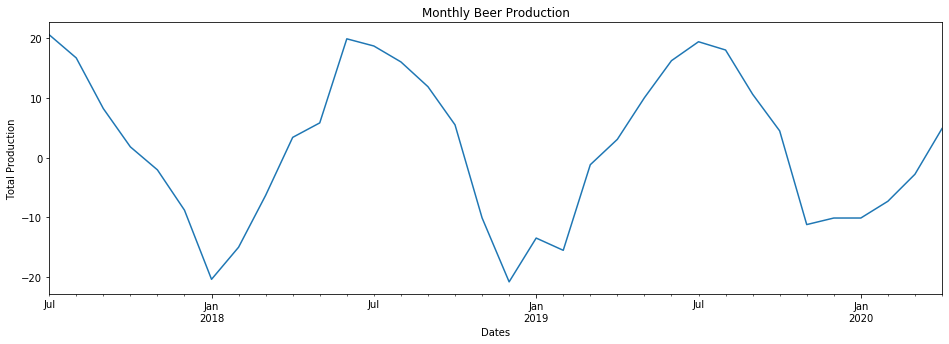

In [6]:
ax = y.plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

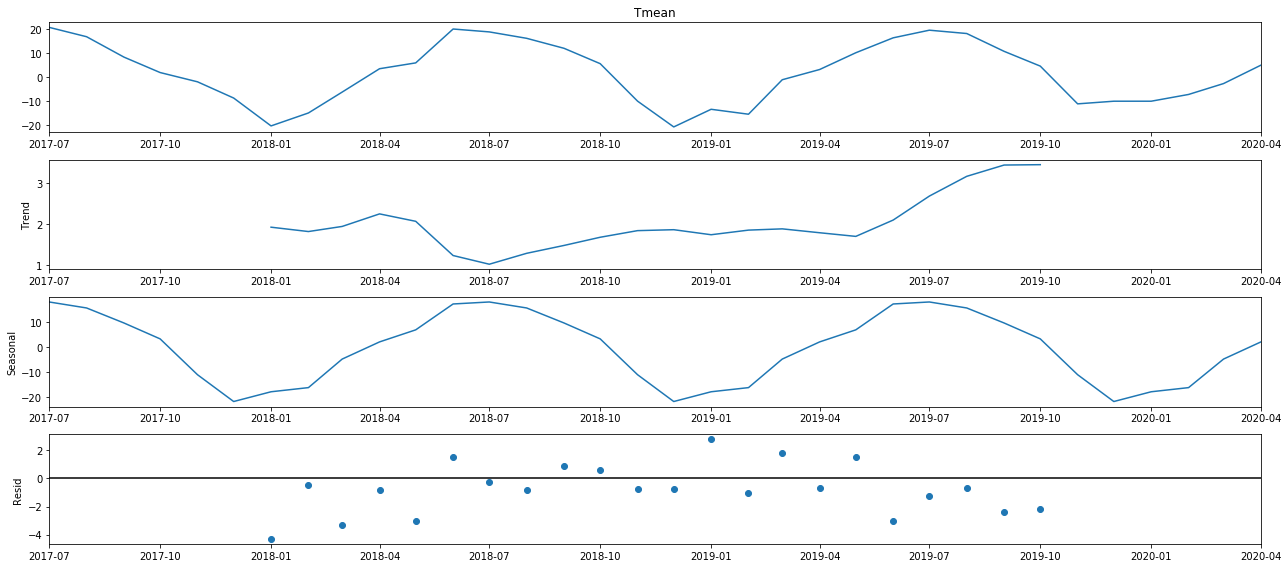

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
a = seasonal_decompose(y, model = "add")
a.plot();

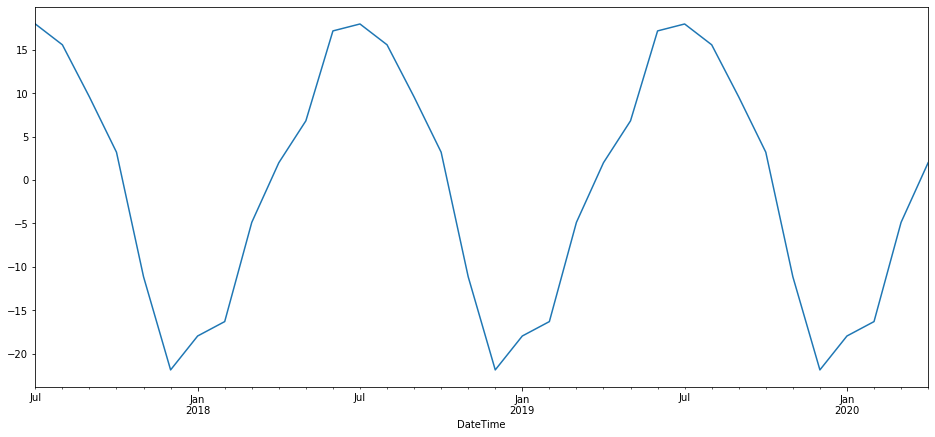

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,7))
a.seasonal.plot();

In [9]:
auto_arima(y, seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   34
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                 -66.665
Date:                  Wed, 03 Jun 2020   AIC                            135.329
Time:                          21:57:50   BIC                            136.421
Sample:                               0   HQIC                           135.586
                                   - 34                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        25.0912      6.970      3.600      0.000      11.430      38.752
===================================================================================
Ljung-Box (Q):                       15.52   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.80   Prob(JB):                         0.56
Heteroskedasticity (H):               0.70   Skew:                            -0.45
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
train_data = y[:len(y)-12]
test_data = y[len(y)-12:]

In [11]:
arima_model = SARIMAX(train_data, order = (2,0,3))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Tmean   No. Observations:                   22
Model:               SARIMAX(2, 0, 3)   Log Likelihood                 -64.477
Date:                Wed, 03 Jun 2020   AIC                            140.954
Time:                        21:57:50   BIC                            147.500
Sample:                    07-01-2017   HQIC                           142.496
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7122      0.024     72.205      0.000       1.666       1.759
ar.L2         -0.9999      0.011    -89.263      0.000      -1.022      -0.978
ma.L1         -1.6052      8.764     -0.183      0.855     -18.782      15.571
ma.L2          0.8551      9.273      0.092      0.927     -17.320      19.030
ma.L3          0.0794      1.282      0.062      0.951      -2.433       2.592
sigma2        13.5286    143.431      0.094      0.925    -267.591     294.648
===================================================================================
Ljung-Box (Q):                       24.31   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.28   Prob(JB):                         0.50
Heteroskedasticity (H):               1.13   Skew:                            -0.43
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
arima_pred = arima_result.predict(start = len(train_data), end = len(y)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2019-05-01    11.584263
2019-06-01    16.750828
2019-07-01    17.058112
2019-08-01    12.457038
2019-09-01     4.271864
2019-10-01    -5.141948
2019-11-01   -13.075564
2019-12-01   -17.246249
2020-01-01   -16.454179
2020-02-01   -10.927602
2020-03-01    -2.257071
2020-04-01     7.062323
Freq: MS, Name: ARIMA Predictions, dtype: float64

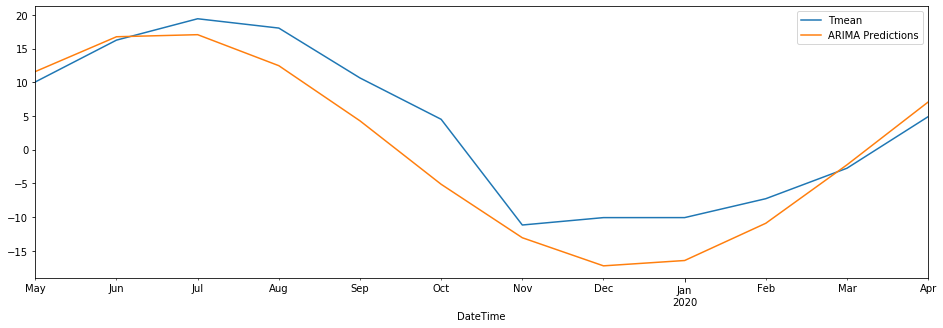

In [13]:
test_data.plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [14]:
arima_rmse_error = rmse(test_data, arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = y.mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 23.8682507256768
RMSE Error: 4.885514376775162
Mean: 1.7880133669132534


In [15]:
test_data['ARIMA_Predictions'] = arima_pred
